In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

# Loading the dataset
train_df = pd.read_csv('/kaggle/input/plant-pathology-2020-fgvc7/train.csv')
test_df = pd.read_csv('/kaggle/input/plant-pathology-2020-fgvc7/test.csv')

# Displaying the first few rows of the training dataset
train_df.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


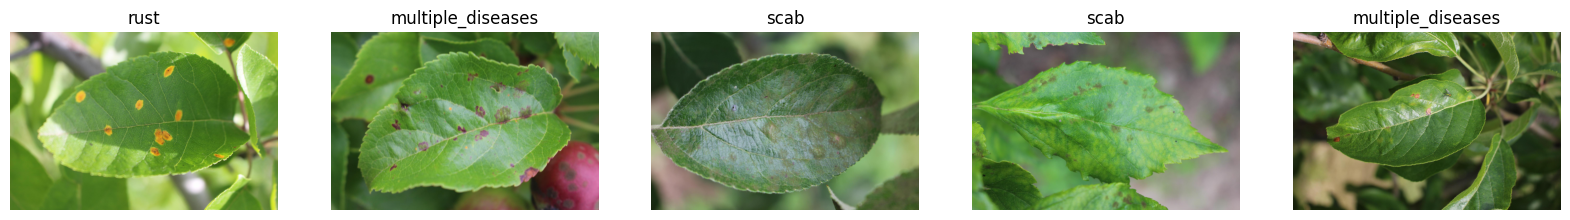

In [3]:
import os
from PIL import Image

img_dir = '/kaggle/input/plant-pathology-2020-fgvc7/images'
sample_images = train_df.sample(5)
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for ax, (i, row) in zip(axes, sample_images.iterrows()):
    img_path = os.path.join(img_dir, row['image_id'] + '.jpg')
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(row.drop('image_id').idxmax())
plt.show()


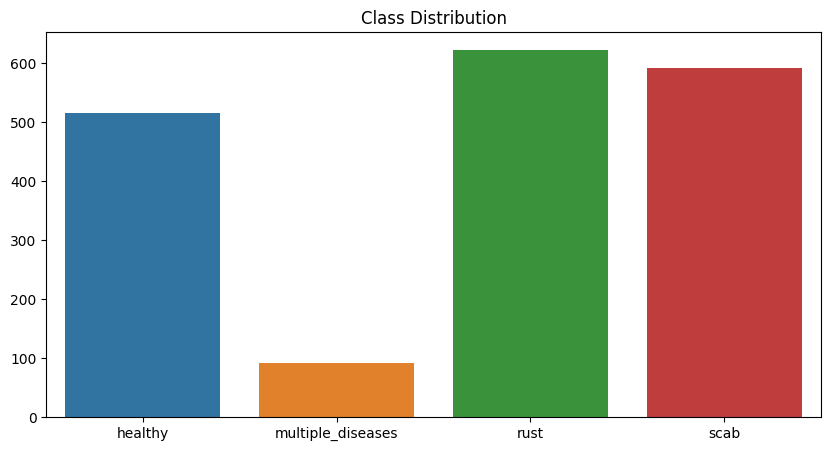

In [4]:
class_counts = train_df.drop('image_id', axis=1).sum()
plt.figure(figsize=(10, 5))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

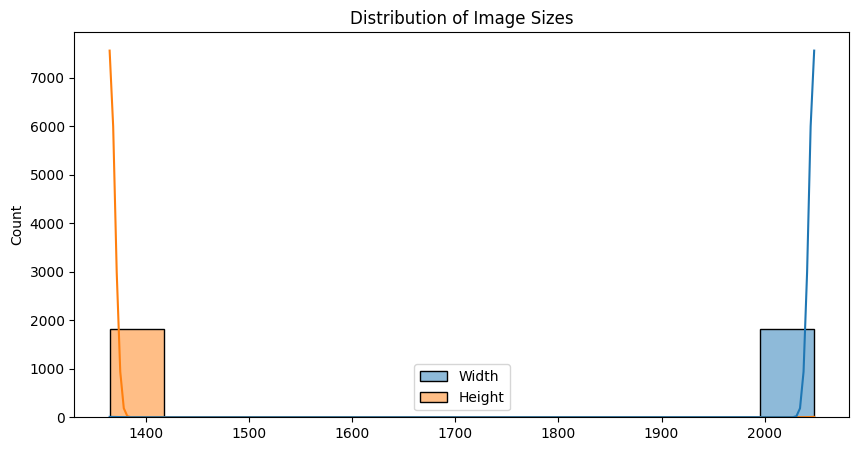

In [5]:
img_sizes = []
for img_id in train_df['image_id']:
    img_path = os.path.join(img_dir, img_id + '.jpg')
    img = Image.open(img_path)
    img_sizes.append(img.size)

img_sizes_df = pd.DataFrame(img_sizes, columns=['Width', 'Height'])
plt.figure(figsize=(10, 5))
sns.histplot(img_sizes_df, kde=True)
plt.title('Distribution of Image Sizes')
plt.show()


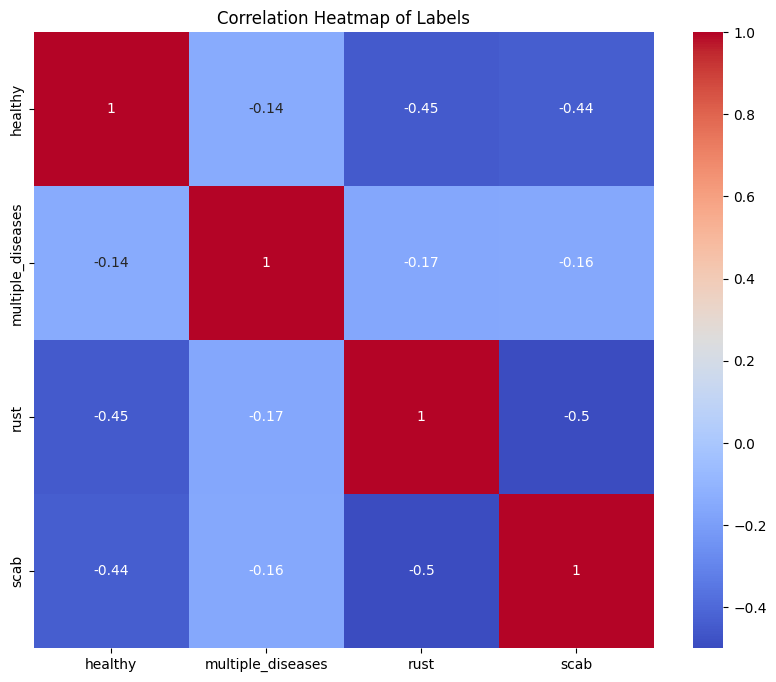

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.drop('image_id', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Labels')
plt.show()

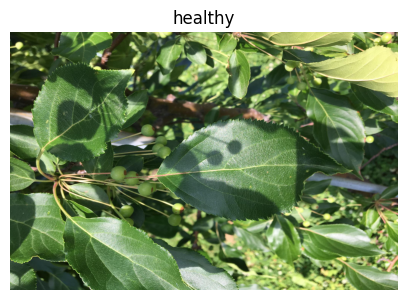

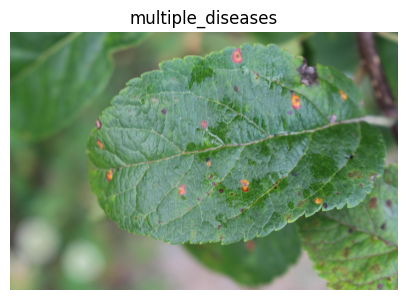

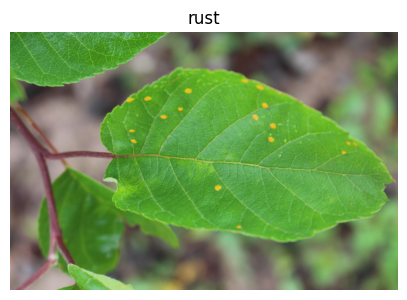

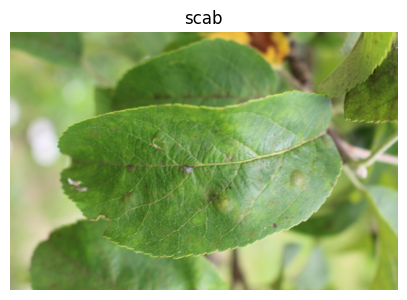

In [7]:
# Visualizing images of each class
for label in train_df.columns[1:]:
    sample_image_id = train_df[train_df[label] == 1].sample(1)['image_id'].values[0]
    img_path = os.path.join(img_dir, sample_image_id + '.jpg')
    img = Image.open(img_path)
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
    plt.show()


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Split the data into features and labels
X = train_df['image_id']
y = train_df[['healthy', 'multiple_diseases', 'rust', 'scab']]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

def load_and_preprocess_image(image_id, target_size=(224, 224), is_train=True):
    image_path = f"/kaggle/input/plant-pathology-2020-fgvc7/images/{image_id}.jpg"
    image = load_img(image_path, target_size=target_size)
    image = img_to_array(image)
    image /= 255.0  # Normalize the image to the range [0, 1]
    return image


# Apply the function to obtain the image data
X_train = np.array([load_and_preprocess_image(img_id) for img_id in X_train])
X_val = np.array([load_and_preprocess_image(img_id) for img_id in X_val])

# Convert labels to numpy arrays
y_train = y_train.values
y_val = y_val.values

# Apply the function to obtain the test image data
X_test = np.array([load_and_preprocess_image(img_id) for img_id in test_df['image_id']])

# Define the number of output classes
num_classes = y.shape[1]
y_columns = y.columns

The dataset was segmented into features and labels, with image_id serving as the feature and the columns healthy, multiple_diseases, rust, and scab 
representing the target labels. The data was divided into training and validation sets using an 80-20 split, with a fixed random seed to ensure reproducibility of results. Each image was then loaded and preprocessed using a custom function that resized the images to a standard dimension of 224x224 pixels and normalized the pixel values to a range between 0 and 1. The preprocessing was applied to all images in both training and validation sets, converting them into numpy arrays suitable for model input. Labels were similarly converted into numpy arrays to ensure compatibility with the Keras framework used for model training. Additionally, the test dataset underwent the same preprocessing steps to maintain consistency. The number of output classes, derived from the label columns, was defined to match the network's output layer, enabling accurate prediction of the four plant health statuses.

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.3215 - loss: 2.6487 - val_accuracy: 0.4274 - val_loss: 1.2253
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.4057 - loss: 1.2120 - val_accuracy: 0.4658 - val_loss: 1.1914
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.5218 - loss: 1.1187 - val_accuracy: 0.5014 - val_loss: 1.1463
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.6300 - loss: 0.9377 - val_accuracy: 0.5205 - val_loss: 1.2536
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.7270 - loss: 0.7113 - val_accuracy: 0.5589 - val_loss: 1.1573
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8270 - loss: 0.4583 - val_accuracy: 0.5233 - val_loss: 1.3366
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8999 - loss: 0.3228 - val_accuracy: 0.5671 - val_loss: 1.4962
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.9300 - loss: 0.2181 - val_accuracy: 0.5644 - val_loss:

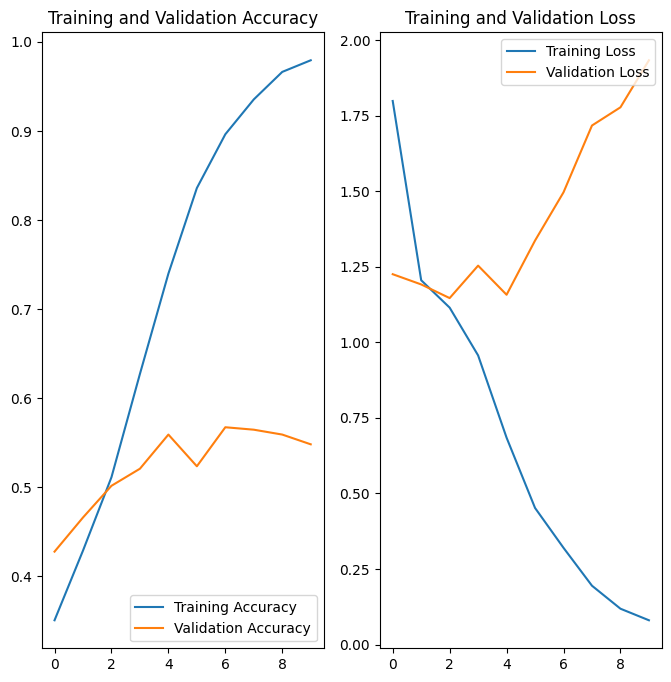

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 430ms/step


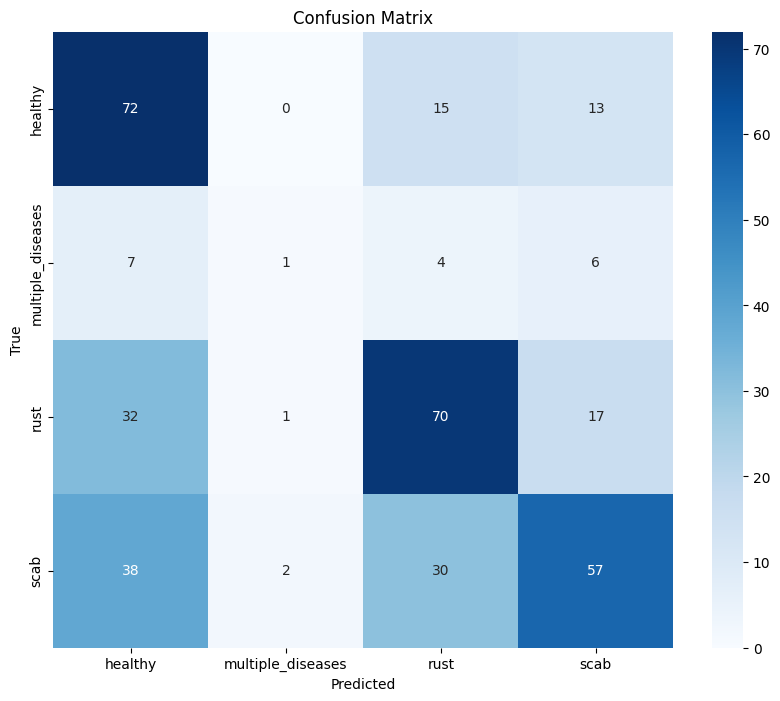

F1 Score: 0.5358073065094467
Accuracy: 0.547945205479452
Precision: 0.551367377048065
Recall: 0.547945205479452


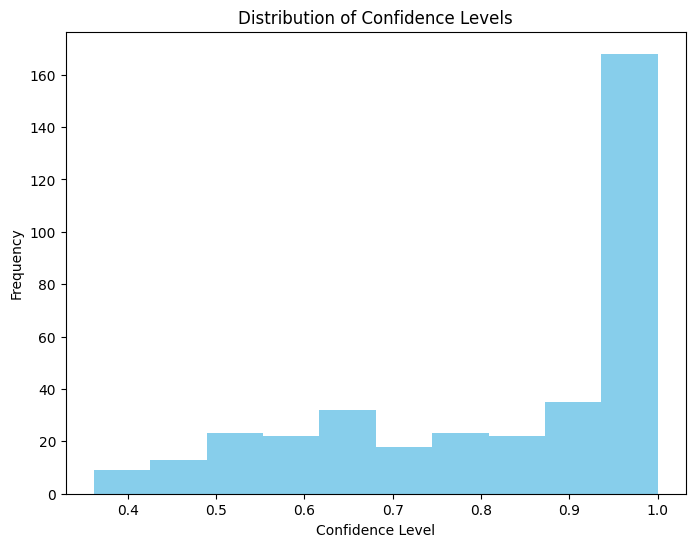

In [9]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential  # Add this import statement
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score


# Simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Plotting the training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the model
y_val_pred_proba = model.predict(X_val)
y_val_pred = np.argmax(y_val_pred_proba, axis=1)

# Get true labels
y_val_true = np.argmax(y_val, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_val_true, y_val_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y_columns, yticklabels=y_columns)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate F1-score, accuracy, precision, and recall
f1 = f1_score(y_val_true, y_val_pred, average='weighted')
accuracy = accuracy_score(y_val_true, y_val_pred)
precision = precision_score(y_val_true, y_val_pred, average='weighted')
recall = recall_score(y_val_true, y_val_pred, average='weighted')

print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Determine confidence levels
confidence_levels = np.max(y_val_pred_proba, axis=1)

# Add code to visualize confidence levels
plt.figure(figsize=(8, 6))
plt.hist(confidence_levels, bins=10, color='skyblue')
plt.title('Distribution of Confidence Levels')
plt.xlabel('Confidence Level')
plt.ylabel('Frequency')
plt.show()

A baseline CNN model was constructed, starting with a convolutional layer with 32 filters of size 3x3 and ReLU activation, followed by a max-pooling layer to reduce spatial dimensions and enhance translation invariance. This was succeeded by another convolutional layer with 64 filters and a max-pooling layer. The output was then flattened into a 1D feature vector, passed through a dense layer with 128 neurons and ReLU activation to capture complex patterns, followed by a dropout layer with a rate of 0.5 to prevent overfitting. The final layer, with a softmax activation, provided a probability distribution over the four classes of plant health conditions. The model was compiled using the Adam optimizer and categorical cross-entropy loss function, with accuracy as the performance metric. Training was conducted over 10 epochs with a batch size of 32, using a training set and a validation set for monitoring generalization performance.

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 631s 13s/step - accuracy: 0.3689 - loss: 2.3082 - val_accuracy: 0.2670 - val_loss: 1.3113
Epoch 2/10
 1/45 ━━━━━━━━━━━━━━━━━━━━ 8:53 12s/step - accuracy: 0.5625 - loss: 0.9041

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.5625 - loss: 0.9041 - val_accuracy: 0.3077 - val_loss: 1.1796
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 585s 13s/step - accuracy: 0.6452 - loss: 1.1927 - val_accuracy: 0.3523 - val_loss: 4.5454
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.8125 - loss: 0.3970 - val_accuracy: 0.2308 - val_loss: 4.6227
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 588s 13s/step - accuracy: 0.7494 - loss: 0.8416 - val_accuracy: 0.3267 - val_loss: 3.7094
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.7188 - loss: 2.0697 - val_accuracy: 0.3846 - val_loss: 2.0233
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 588s 13s/step - accuracy: 0.7790 - loss: 0.6267 - val_accuracy: 0.2756 - val_loss: 18.1992
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.8750 - loss: 0.5367 - val_accuracy: 0.2308 - val_loss: 17.6890
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 595s 13s/step - accuracy: 0.8273 - loss: 0.6050 - val_accuracy: 0.2500 - va

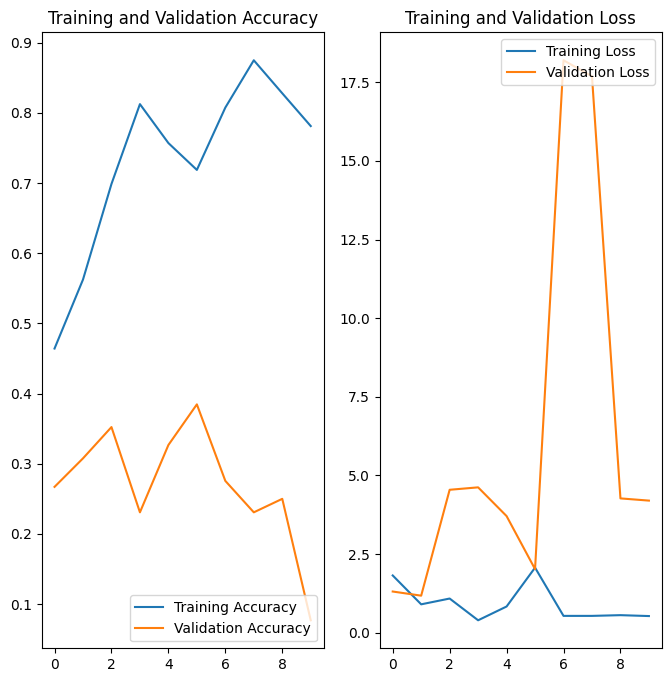

57/57 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step


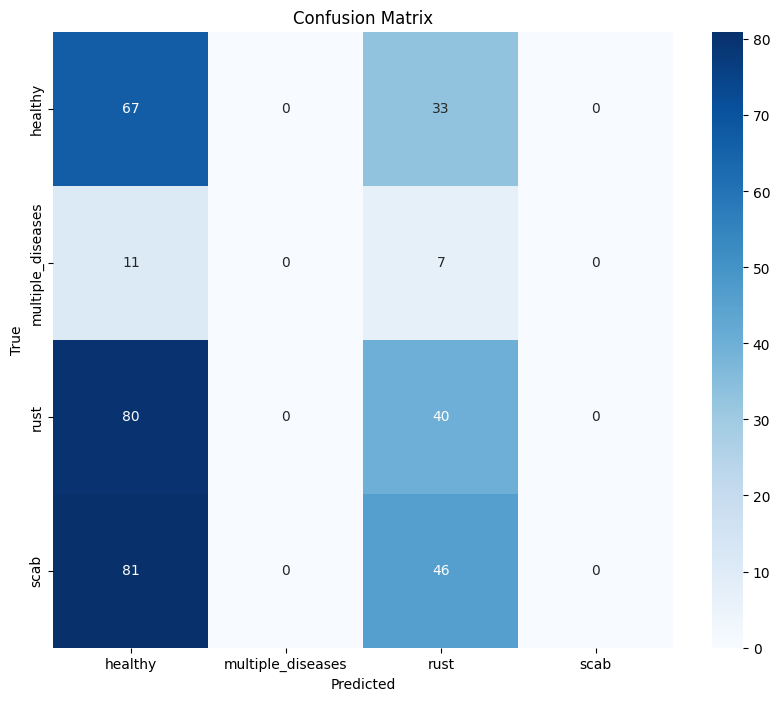

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 Score: 0.21521209271978767
Accuracy: 0.29315068493150687
Precision: 0.18117455040708325
Recall: 0.29315068493150687


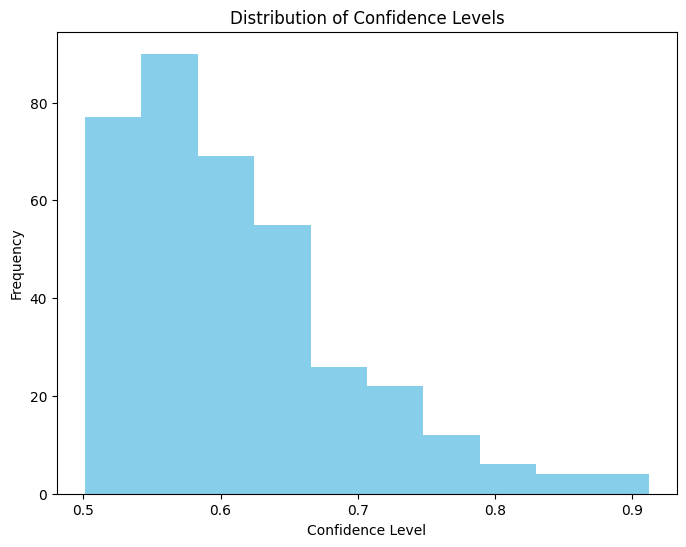

In [10]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.utils.class_weight import compute_class_weight

# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=30,  # Increased rotation range
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'  # Added fill mode
)

val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)

# Transfer learning with ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers[:-10]:  # Unfreeze last 10 layers
    layer.trainable = True

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(512, activation='relu')(x)  # Increased dense layer size
x = layers.BatchNormalization()(x)  # Added batch normalization
x = layers.Dropout(0.6)(x)  # Increased dropout
output = layers.Dense(4, activation='softmax')(x)

model = models.Model(inputs=base_model.input, outputs=output)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(np.argmax(y_train, axis=1)), y=np.argmax(y_train, axis=1))
class_weights = dict(enumerate(class_weights))

optimizer = optimizers.Adam(learning_rate=0.0001)  # Lower learning rate
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model for more epochs
history = model.fit(train_generator,
                    steps_per_epoch=len(X_train) // 32,
                    epochs=10,
                    validation_data=val_generator,
                    validation_steps=len(X_val) // 32,
                    class_weight=class_weights)

# Plotting the training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Load and preprocess test images
X_test = np.array([load_and_preprocess_image(img_id, is_train=False) for img_id in test_df['image_id']])

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
y_val_pred_proba = model.predict(val_generator)
y_val_pred = np.argmax(y_val_pred_proba, axis=1)

# Get true labels
val_generator.reset()
y_val_true = []
for i in range(len(val_generator)):
    y_val_true.extend(np.argmax(val_generator[i][1], axis=1))
y_val_true = np.array(y_val_true)

# Confusion Matrix
conf_matrix = confusion_matrix(y_val_true, y_val_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['healthy', 'multiple_diseases', 'rust', 'scab'], yticklabels=['healthy', 'multiple_diseases', 'rust', 'scab'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate F1-score, accuracy, precision, and recall
f1 = f1_score(y_val_true, y_val_pred, average='weighted')
accuracy = accuracy_score(y_val_true, y_val_pred)
precision = precision_score(y_val_true, y_val_pred, average='weighted')
recall = recall_score(y_val_true, y_val_pred, average='weighted')

print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Determine confidence levels
confidence_levels = np.max(y_val_pred_proba, axis=1)

# Add code to visualize confidence levels
plt.figure(figsize=(8, 6))
plt.hist(confidence_levels, bins=10, color='skyblue')
plt.title('Distribution of Confidence Levels')
plt.xlabel('Confidence Level')
plt.ylabel('Frequency')
plt.show()

The thinking was....  using data augmentation like rotation, shifting, shearing, zooming, and flipping,to diversify the training data, exposing the model to a broader range of variations present in real-world images. This augmentation technique helps mitigate overfitting and enhances the model's ability to generalize to unseen data. A pre-trained ResNet50 model used as a feature extractor, enables the leveraging of knowledge learned from a large dataset to the current task of plant pathology classification. By freezing the pre-trained layers and fine-tuning the top layers, the model can adapt its representations to the specific features of the plant pathology dataset ... however this was terrible

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 411s 8s/step - accuracy: 0.3141 - loss: 1.3650 - val_accuracy: 0.3295 - val_loss: 1.2826
Epoch 2/10
 1/45 ━━━━━━━━━━━━━━━━━━━━ 5:17 7s/step - accuracy: 0.2188 - loss: 1.4306

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.2188 - loss: 1.4306 - val_accuracy: 0.3077 - val_loss: 1.2654
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 355s 8s/step - accuracy: 0.3188 - loss: 1.2897 - val_accuracy: 0.3324 - val_loss: 1.2997
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.2812 - loss: 1.2253 - val_accuracy: 0.2308 - val_loss: 1.3985
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 357s 8s/step - accuracy: 0.3501 - loss: 1.2622 - val_accuracy: 0.3239 - val_loss: 1.2774
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.3750 - loss: 1.2300 - val_accuracy: 0.4615 - val_loss: 1.2404
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 361s 8s/step - accuracy: 0.3381 - loss: 1.2800 - val_accuracy: 0.3267 - val_loss: 1.2625
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.2500 - loss: 1.2271 - val_accuracy: 0.4615 - val_loss: 1.1099
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 357s 8s/step - accuracy: 0.3197 - loss: 1.2579 - val_accuracy: 0.3068 - val_loss: 1.

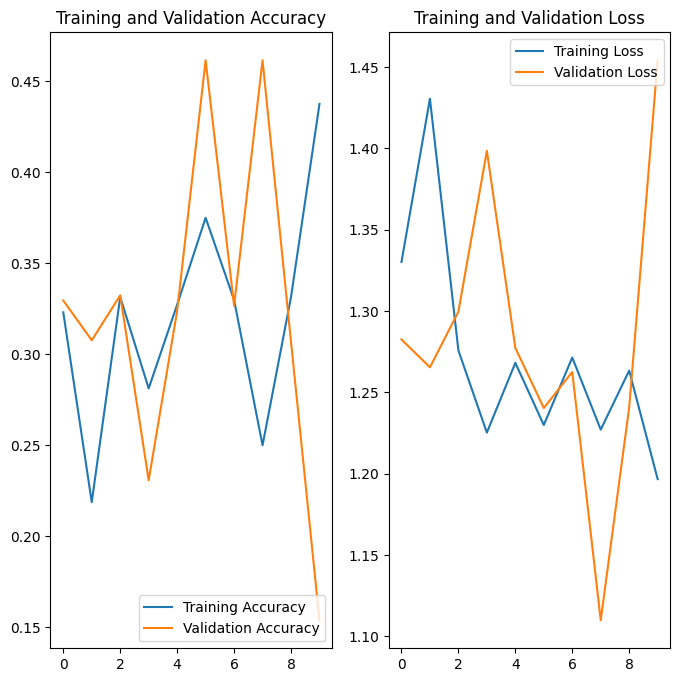

57/57 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step


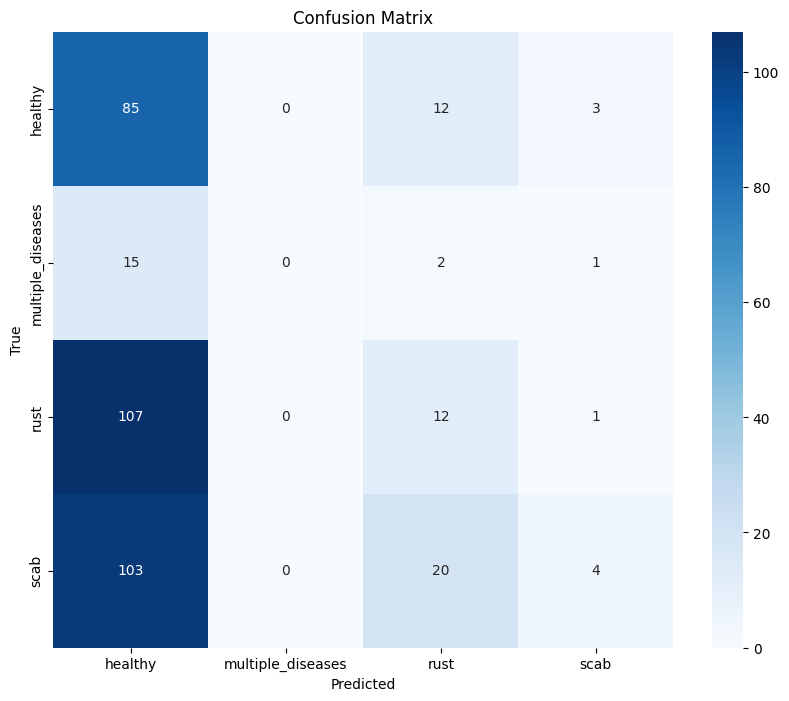

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 Score: 0.1815983574241148
Accuracy: 0.27671232876712326
Precision: 0.3155291701623043
Recall: 0.27671232876712326


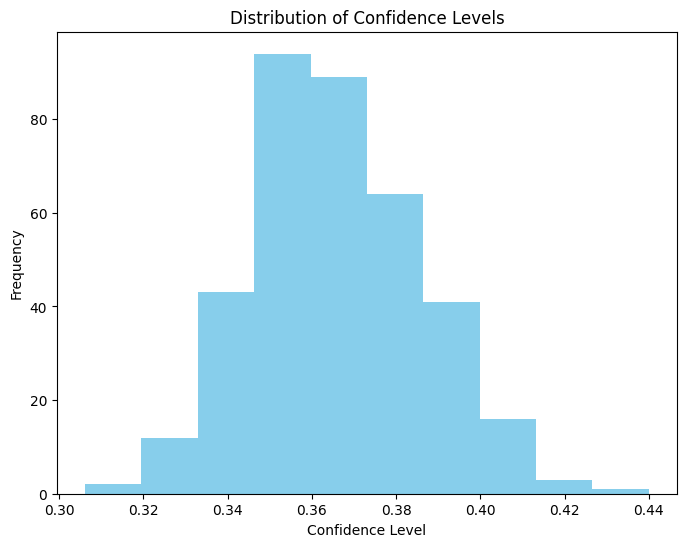

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, InceptionV3
from tensorflow.keras import layers, models, optimizers

# Define custom data augmentation functions (if used)
def random_contrast(image):
    # Implement random contrast adjustment
    return adjusted_image

def add_gaussian_noise(image):
    # Implement adding Gaussian noise
    return noisy_image

def random_erasing(image):
    # Implement random erasing
    return erased_image

def cutout(image):
    # Implement cutout
    return cutout_image

# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.5, 1.5],  # Adjust brightness
)

val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)

# Choose a different pretrained model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Fine-tuning
for layer in base_model.layers:
    layer.trainable = True

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(4, activation='softmax')(x)

model = models.Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),  # Adjust learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with the new data augmentation and pretrained model
history = model.fit(train_generator,
                    steps_per_epoch=len(X_train) // 32,  # Ensure steps_per_epoch is an integer
                    epochs=10,  # Increase epochs for more training
                    validation_data=val_generator,
                    validation_steps=len(X_val) // 32)  # Ensure validation_steps is an integer

# Plotting the training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Load and preprocess test images
X_test = np.array([load_and_preprocess_image(img_id, is_train=False) for img_id in test_df['image_id']])

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
y_val_pred_proba = model.predict(val_generator)
y_val_pred = np.argmax(y_val_pred_proba, axis=1)

# Get true labels
val_generator.reset()
y_val_true = []
for i in range(len(val_generator)):
    y_val_true.extend(np.argmax(val_generator[i][1], axis=1))
y_val_true = np.array(y_val_true)

# Confusion Matrix
conf_matrix = confusion_matrix(y_val_true, y_val_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['healthy', 'multiple_diseases', 'rust', 'scab'], yticklabels=['healthy', 'multiple_diseases', 'rust', 'scab'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate F1-score, accuracy, precision, and recall
f1 = f1_score(y_val_true, y_val_pred, average='weighted')
accuracy = accuracy_score(y_val_true, y_val_pred)
precision = precision_score(y_val_true, y_val_pred, average='weighted')
recall = recall_score(y_val_true, y_val_pred, average='weighted')

print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Determine confidence levels
confidence_levels = np.max(y_val_pred_proba, axis=1)

# Add code to visualize confidence levels
plt.figure(figsize=(8, 6))
plt.hist(confidence_levels, bins=10, color='skyblue')
plt.title('Distribution of Confidence Levels')
plt.xlabel('Confidence Level')
plt.ylabel('Frequency')
plt.show()
